# Ejercicio de regresión logística

In [ ]:
# Importamos las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Leemos los datos
data = pd.read_csv('https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/ex2data1.txt', header=None, names=['exam_1', 'exam_2','Admitted'])
data.head()

,exam_1,exam_2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [ ]:
data['Admitted'].value_counts()

1    60
0    40
Name: Admitted, dtype: int64

<Axes: xlabel='exam_1', ylabel='exam_2'>

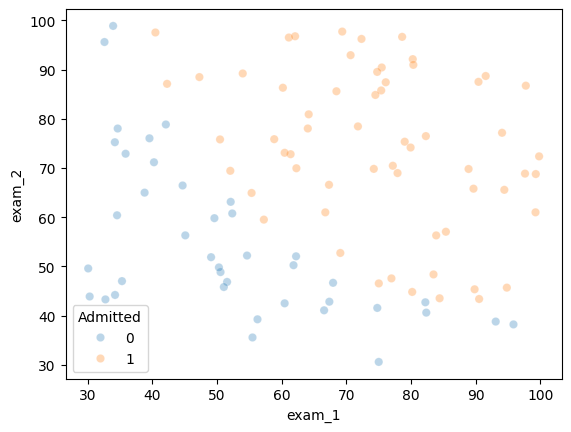

In [ ]:
# Representamos la relación entre variables para las dos categorías del target
sns.scatterplot(x='exam_1', y='exam_2', hue='Admitted', alpha =0.3, data=data)

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

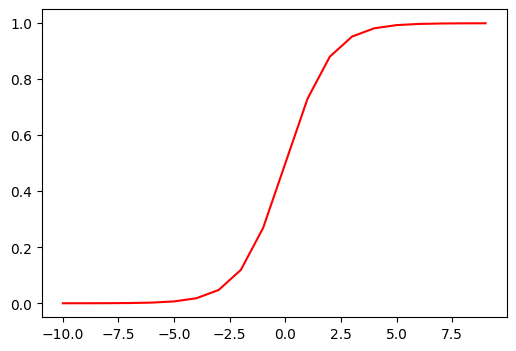

In [ ]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(nums, sigmoid(nums), 'r')

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
X = data[['exam_1', 'exam_2']]
y = data[['Admitted']]
logmodel.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
# Predict 0 / 1
pred_bin = logmodel.predict(X)
print(pred_bin[0:10])

# Predict Proba
pred_proba = logmodel.predict_proba(X)
print(pred_proba[0:10])

[0 0 0 1 1 0 1 0 1 1]
[[9.08176032e-01 9.18239681e-02]
 [9.99955857e-01 4.41425284e-05]
 [9.55542751e-01 4.44572493e-02]
 [9.76926294e-03 9.90230737e-01]
 [1.85053349e-03 9.98149467e-01]
 [9.88990962e-01 1.10090385e-02]
 [1.05307256e-03 9.98946927e-01]
 [5.76277848e-01 4.23722152e-01]
 [3.00363442e-04 9.99699637e-01]
 [2.65301204e-01 7.34698796e-01]]


In [ ]:
pred_proba.shape

(100, 2)

In [ ]:
pred_proba[:,1][0:10]

array([9.18239681e-02, 4.41425284e-05, 4.44572493e-02, 9.90230737e-01,
       9.98149467e-01, 1.10090385e-02, 9.98946927e-01, 4.23722152e-01,
       9.99699637e-01, 7.34698796e-01])

In [ ]:
# Metricas de evaluación del modelo
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
print("Accuracy:",accuracy_score(y,pred_bin))
print("Precisión:",precision_score(y,pred_bin))
print("recall_score:",recall_score(y,pred_bin))
print("F1_score:",f1_score(y,pred_bin))
print("ROC Area:",roc_auc_score(y,pred_proba[:,1]))

Accuracy: 0.89
Precisión: 0.9016393442622951
recall_score: 0.9166666666666666
F1_score: 0.9090909090909091
ROC Area: 0.9733333333333334


# Ejemplo de modelado y evaluación (churn)

In [ ]:
#Modelado
## ¿Podrías intentar mejorar el modelo actual creando nuevas variables?
## ¿Que equipo tendrá mejor AUC?
# Importamos las diferentes librerías
## Nombre de la librería y alias que le ponemos en nuestro notebook
## Los alias con las que las importamos suelen ser muy estandares

# Importar y manipular datos
import pandas as pd

# Graficar datos
import seaborn as sns
import matplotlib.pyplot as plt

# Algebra
import numpy as np

import warnings
warnings.filterwarnings('ignore')
# Cargamos
df = pd.read_csv('https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/telecom_churn.csv')

# Pasamos Churn a numerica
df['Churn'] = df['Churn'].astype('int64')

# Creamos variables dummies
vmp = pd.get_dummies(df['Voice mail plan'],drop_first=True,prefix="voice")   #
ip = pd.get_dummies(df['International plan'],drop_first=True,prefix="ip")

# Quitamos columna State.
# TO DO: ¿Alguna idea para ahora?
df.drop('State',axis=1,inplace=True)

# Quitamos columnas voice mail e International plan
df.drop(['Voice mail plan','International plan'],axis=1,inplace=True)
df = pd.concat([df,vmp,ip],axis=1)

# TO DO: ¿Podemos crear más variables?


# Separamos train y test
import random
random.seed(113)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn',axis=1),
                                                    df['Churn'], test_size=0.25,
                                                    random_state=101)



## Ejercicio

Modifica los hyperparametros para maximizar tu AUC
- `max_depth`
- `max_features`

[Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [ ]:
# Importamos el modelo y entrenamos
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score


import warnings
warnings.filterwarnings('ignore')
#rf_mod = RandomForestClassifier()
rf_mod = RandomForestClassifier(max_depth=20, min_samples_split= 5, min_samples_leaf = 10 ,random_state=101)
rf_mod.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=5,
                       random_state=101)

In [ ]:
pres_test = rf_mod.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, pres_test[:,1])
print('Team AUC:', roc_auc)

Team AUC: 0.9016134300084918


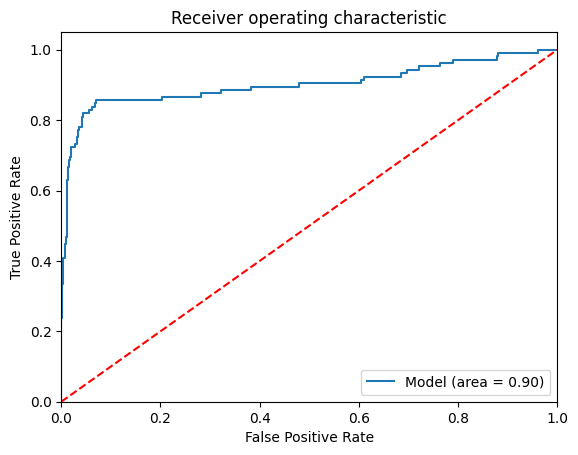

In [ ]:
# Representa la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, pres_test[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Model (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print('Team AUC:', roc_auc)

Team AUC: 0.9016134300084918


# Ejercicio XGBoost

- Ajusta un xgboost y calcula el accuracy de tu modelo
- Utiliza el método predic_ proba para sacar la probabilidades de conversión de los usuarios
- Evalua con las diferentes métricas de evaluación

In [ ]:
def accuracy_v2(y_true, y_pred):
  tp = true_positive(y_true, y_pred)
  fp = false_positive(y_true, y_pred)
  fn = false_negative(y_true, y_pred)
  tn = true_negative(y_true, y_pred)
  accuracy_score = (tp + tn) / (tp + tn + fp + fn)
  return accuracy_score

In [ ]:
xgboost = XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=100, gamma=0,
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)

xgboost.fit(X_train, y_train)
preds = xgboost.predict(X_test)

accuracy_score(preds,y_test)
accuracy = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy WITH optimal hyperparameters is: %3.2f" % (accuracy))


XGBoost's prediction accuracy WITH optimal hyperparameters is: 92.81


In [ ]:
# Utiliza el método predict_proba
preds_p = xgboost.predict_proba(X_test)
preds_p

array([[0.9033433 , 0.0966567 ],
       [0.89282566, 0.10717436],
       [0.8879126 , 0.11208742],
       ...,
       [0.90987426, 0.09012572],
       [0.90464413, 0.0953559 ],
       [0.8756596 , 0.1243404 ]], dtype=float32)

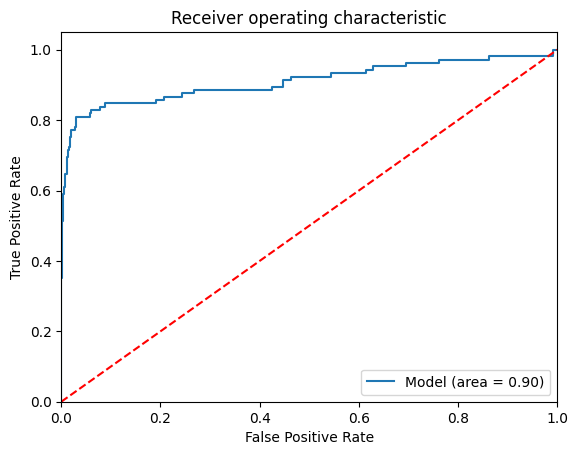

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, preds_p[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Model (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, auc
auc(fpr,tpr)

0.9099875889999346

In [ ]:
roc_auc = ...
print('Team AUC:', roc_auc)

# Evalua tu modelo con diferentes métricas de evaluación
- Precisión
- Recall

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

¿Cual es mejor para evaluar el modelo?

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
def precision(y_true, y_pred):
  tp = true_positive(y_true, y_pred)
  fp = false_positive(y_true, y_pred)
  precision = tp / (tp + fp)
  return precision

In [ ]:
def recall(y_true, y_pred):
  tp = true_positive(y_true, y_pred)
  fn = false_negative(y_true, y_pred)
  recall = tp / (tp + fn)
  return recall

# Ejercicio
- Selecciona a los 1000 usuarios con más probabilidad de churn
- Selecciona los usuarios con probabilidades de churn entre el 0.3 y 0.5
  - Realiza un EDA de estos usuarios. ¿Tienen algún patrón en común?


# Ejercicio
- Ajusta los hyperparámetros del xgboost y busca el mejor modelo en test

# CV - All together

- Logistic
- k-NN
- Random Forest
- xgboost

Benchmark entre ellos y competición por equipos

In [ ]:
# Importamos las diferentes librerías
## Nombre de la librería y alias que le ponemos en nuestro notebook
## Los alias con las que las importamos suelen ser muy estandares

# Importar y manipular datos
import pandas as pd

# Graficar datos
import seaborn as sns
import matplotlib.pyplot as plt

# Algebra
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Cargamos
df = pd.read_csv('https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/telecom_churn.csv')

# Pasamos Churn a numerica
df['Churn'] = df['Churn'].astype('int64')

# Creamos variables dummies
vmp = pd.get_dummies(df['Voice mail plan'],drop_first=True,prefix="voice")   #
ip = pd.get_dummies(df['International plan'],drop_first=True,prefix="ip")
state = pd.get_dummies(df['State'],drop_first=False)


# Quitamos columnas voice mail e International plan
df.drop(['Voice mail plan','International plan','State'],axis=1,inplace=True)
df = pd.concat([df,vmp,ip,state],axis=1)

In [ ]:
df.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,0,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,0,0,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,0,0,0


# Separación de train y test


In [ ]:
# Separamos train y test
import random
random.seed(113)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn',axis=1),
                                                    df['Churn'], test_size=0.25,
                                                    random_state=101)

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

**Logistic Regression**

In [ ]:
random.seed(113)
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

In [ ]:
print(scores['test_roc_auc'].shape)
scores['test_roc_auc']

(20,)


array([0.65732087, 0.775571  , 0.70158888, 0.68917577, 0.77308838,
       0.73684211, 0.80784508, 0.68073486, 0.69165839, 0.84011917,
       0.73982125, 0.69314796, 0.6693148 , 0.78252234, 0.80983118,
       0.80685204, 0.65690169, 0.76266137, 0.69414101, 0.62264151])

**Random Forest**



In [ ]:
random_forest = RandomForestClassifier(random_state = random.seed(113))

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

**k-NN**

In [ ]:
random.seed(113)
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

# Ejercicio (4)
- Haz una comparativa Añadiendo el modelo XGBoost

In [ ]:
random.seed(113)

## MODIFICA / Añade parámetros
xgboost = XGBClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(xgboost, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
XGB_fit_time = scores['fit_time'].mean()
XGB_score_time = scores['score_time'].mean()
XGB_accuracy = scores['test_accuracy'].mean()
XGB_precision = scores['test_precision_macro'].mean()
XGB_recall = scores['test_recall_macro'].mean()
XGB_f1 = scores['test_f1_weighted'].mean()
XGB_roc = scores['test_roc_auc'].mean()

In [ ]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors', 'xgboost'],
    'Fitting time': [LR_fit_time, forest_fit_time, KNN_fit_time, XGB_fit_time],
    'Scoring time': [LR_score_time, forest_score_time, KNN_score_time, XGB_score_time],
    'Accuracy'    : [LR_accuracy, forest_accuracy, KNN_accuracy, XGB_accuracy],
    'Precision'   : [LR_precision, forest_precision, KNN_precision, XGB_precision],
    'Recall'      : [LR_recall, forest_recall, KNN_recall, XGB_recall],
    'F1_score'    : [LR_f1, forest_f1, KNN_f1, XGB_f1],
    'AUC_ROC'     : [LR_roc, forest_roc, KNN_roc, XGB_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
3,xgboost,0.259980,0.035548,0.952777,0.938025,0.873025,0.950620,0.918511
1,Random Forest,0.711657,0.034667,0.932768,0.938527,0.791602,0.925459,0.905417
2,K-Nearest Neighbors,0.007878,0.038318,0.865561,0.761545,0.612085,0.838005,0.678947
0,Logistic Regression,0.161174,0.034865,0.849926,0.705854,0.533254,0.799300,0.729589


In [ ]:
print(max(models_initial['AUC_ROC']))

0.9040901513909383
